In [27]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from urllib import urlretrieve
import cPickle as pickle
import os
import gzip
import numpy as np
import theano
#import lasagne

In [28]:
from lasagne import layers
from nolearn import lasagne
from lasagne.updates import nesterov_momentum
from lasagne import nonlinearities
from nolearn.lasagne import NeuralNet
#from lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
def load_dataset():
    url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    filename = 'mnist.pkl.gz'
    if not os.path.exists(filename):
        print("Downloading MNIST dataset...")
        urlretrieve(url, filename)

    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)

    X_train, y_train = data[0]
    X_val, y_val = data[1]
    X_test, y_test = data[2]

    X_train = X_train.reshape((-1, 1, 28, 28))
    X_val = X_val.reshape((-1, 1, 28, 28))
    X_test = X_test.reshape((-1, 1, 28, 28))

    y_train = y_train.astype(np.uint8)
    y_val = y_val.astype(np.uint8)
    y_test = y_test.astype(np.uint8)

    return X_train, y_train, X_val, y_val, X_test, y_test

(50000, 1, 28, 28)


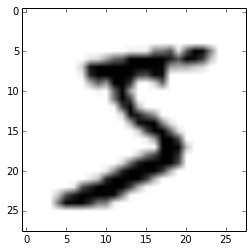

In [30]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print X_train.shape
plt.imshow(X_train[0][0], cmap=cm.binary)

In [33]:
from lasagne import init
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=nonlinearities.rectify,
    conv2d1_W=init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=10,
    verbose=1,
    )

# Train the network
nn = net1.fit(X_train, y_train)

AttributeError: 'DenseLayer' object has no attribute 'get_output_shape'